# Task-3

## For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
import graphviz
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

C:\Users\gursi\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.drop(labels='Id', axis=1, inplace=True)

In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# label encoder for 'Species'

le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [8]:
# Dependent and Independent Variables

x = df.iloc[:, :-1]
y = df['Species']

In [9]:
# Train Test Split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, test_size=0.25)

In [10]:
# Build decision tree model

classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
# Hyperparamter Tuning

parameters = {'max_leaf_nodes': list(range(2, 100)), 
              'min_samples_split': [2, 3, 4]}


grid_search = GridSearchCV(estimator = classifier,
                           param_grid  = parameters,
                           scoring = 'accuracy', 
                           cv = 5,
                           n_jobs=1)

grid_search = grid_search.fit(x_train, y_train)

best_accuracy = grid_search.best_score_   
best_parameters = grid_search.best_params_  

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 97.39 %
Best Parameters: {'max_leaf_nodes': 4, 'min_samples_split': 2}


In [12]:
# Make new DecisionTreeClassifier model with best parameters

final_classifier = DecisionTreeClassifier(max_leaf_nodes=6, min_samples_split=2)
final_classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [13]:
# Predict test set values

predicted_values = final_classifier.predict(x_test)

In [14]:
# Compare Real and Predicted Values

compare_results_df = pd.DataFrame(data=zip(y_test, predicted_values), columns=['Real Values', 'Predicted Values'])
compare_results_df.head()

,Real Values,Predicted Values
0,1,1
1,2,1
2,0,0
3,1,2
4,0,0


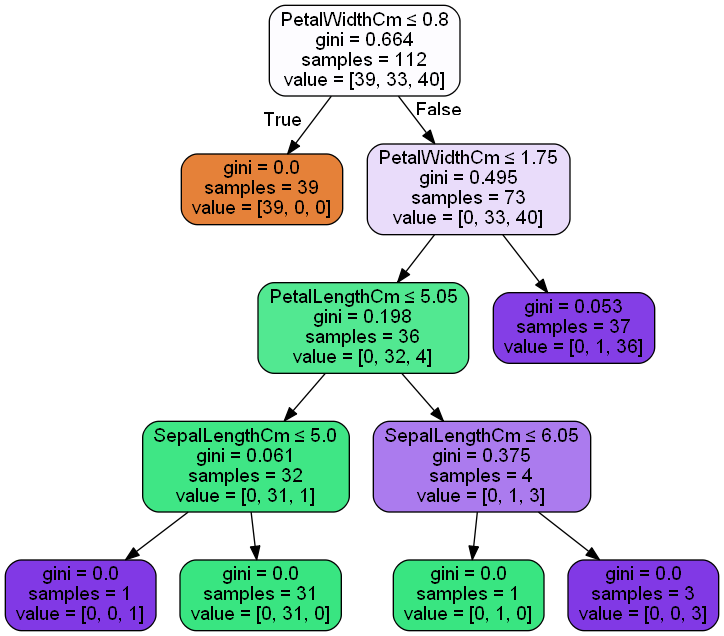

In [15]:
# Visualize the Decision Tree

dot_data = StringIO()
export_graphviz(final_classifier, out_file=dot_data, feature_names=x.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
# Save Model

with open('Model.txt','wb') as f:
    pickle.dump(final_classifier, f)